<a href="https://colab.research.google.com/github/Natalie210985/Final-work/blob/main/Graduation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_theme()

In [32]:
import scipy as spy
from scipy import stats

In [4]:
#1 Загрузите файл HR.csv в pandas dataframe
X = pd.read_csv('HR.csv')
# satisfaction_level - Уровень удовлетворенности работой 
# Last_evaluation - Время с момента последней оценки в годах 
# number_projects - Количество проектов, выполненных за время работы 
# average_monthly_hours - Среднее количество часов на рабочем месте в месяц 
# time_spend_company - Стаж работы в компании в годах 
# work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником 
# left - уволился ли сотрудник 
# promotion_last_5years - повышался ли сотрудник за последние пять лет 
# department - отдел в котором работает сотрудник 
# salary - относительный уровень зарплаты 


In [5]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
X.shape

(14999, 10)

In [7]:
#2 Рассчитайте основные статистики для переменных (среднее(mean)), медиана(50%), мин(min)/макс(max), среднеквадратичное отклонение(std)).
X.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
#2 Рассчитайте основные статистики для переменных (мода).
X.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
X.average_montly_hours.value_counts()
#У столбца 'Среднее количество часов на рабочем месте в месяц' два наиболее популярных значения - 135 и 156.

135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: average_montly_hours, Length: 215, dtype: int64

In [9]:
#3 Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.
#3 Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [10]:
numeric_col = ['satisfaction_level','last_evaluation','number_project','average_montly_hours', 'time_spend_company']

In [11]:
a = X.loc[:,numeric_col]

In [12]:
a.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


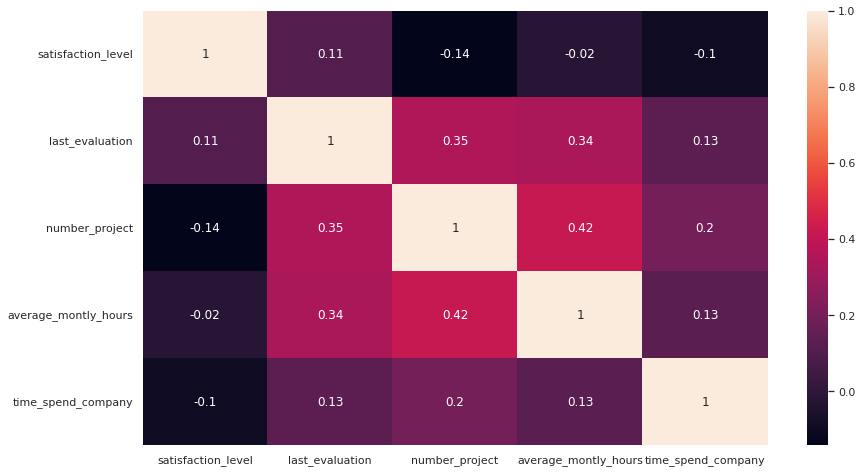

In [13]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(a.corr(), annot=True)
#3 Наиболее скоррелированые переменные 'number_project' и 'average_montly_hours'.
#3 Наименее скоррелированые переменные 'satisfaction_level' и 'average_montly_hours'.

In [96]:
#4 Рассчитайте сколько сотрудников работает в каждом департаменте
X_left = X[X.left != 1]
X_left.groupby('department').left.value_counts().sort_values(ascending=False)

department   left
sales        0       3126
technical    0       2023
support      0       1674
IT           0        954
product_mng  0        704
RandD        0        666
marketing    0        655
accounting   0        563
management   0        539
hr           0        524
Name: left, dtype: int64

Text(0.5, 1.0, 'Number of employees')

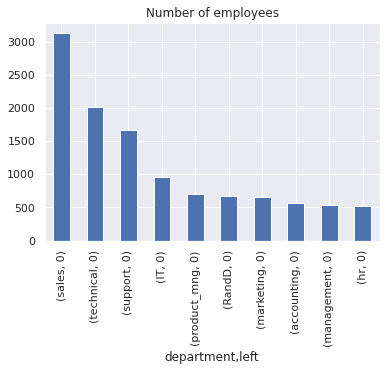

In [97]:
X_left.groupby('department').left.value_counts().sort_values(ascending=False).plot.bar()
plt.title ('Number of employees')

In [98]:
#5 Показать распределение сотрудников по зарплатам.
X_left.groupby('salary').left.value_counts().sort_values(ascending=False)

salary  left
low     0       5144
medium  0       5129
high    0       1155
Name: left, dtype: int64

Text(0.5, 1.0, 'Salary of employees')

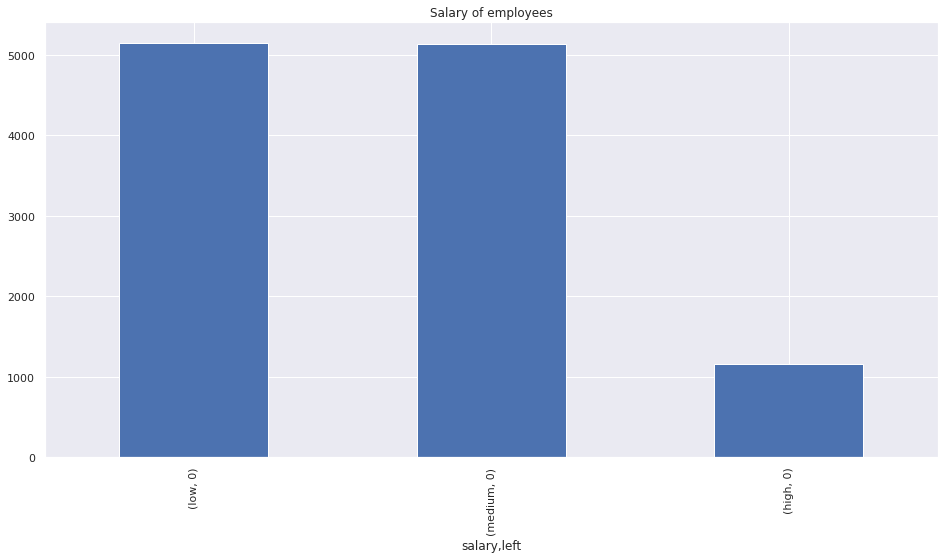

In [99]:
#5 Показать распределение сотрудников по зарплатам.
X_left.groupby('salary').left.value_counts().sort_values(ascending=False).plot.bar(figsize=(16, 8))
plt.title('Salary of employees')

Text(0.5, 1.0, 'Salary of employees')

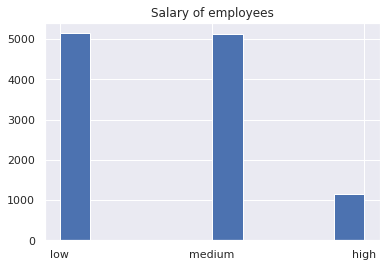

In [100]:
#5 Показать распределение сотрудников по зарплатам (или так)))
X_left.salary.hist(bins=10)
plt.title('Salary of employees')

Text(0.5, 1.0, 'Salary of employees')

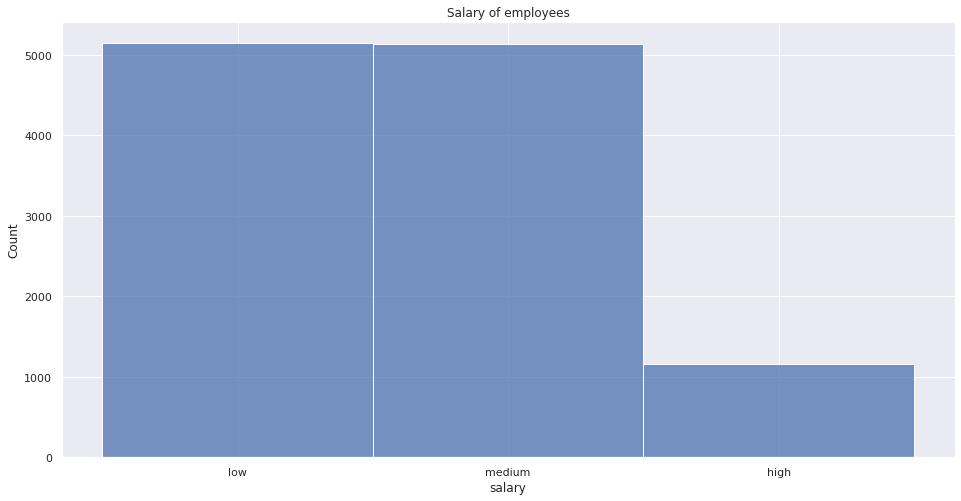

In [101]:
#5 Показать распределение сотрудников по зарплатам (или так)))
fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=X_left, x='salary')
plt.title('Salary of employees')


Text(0.5, 1.0, 'Salary of employees by departaments')

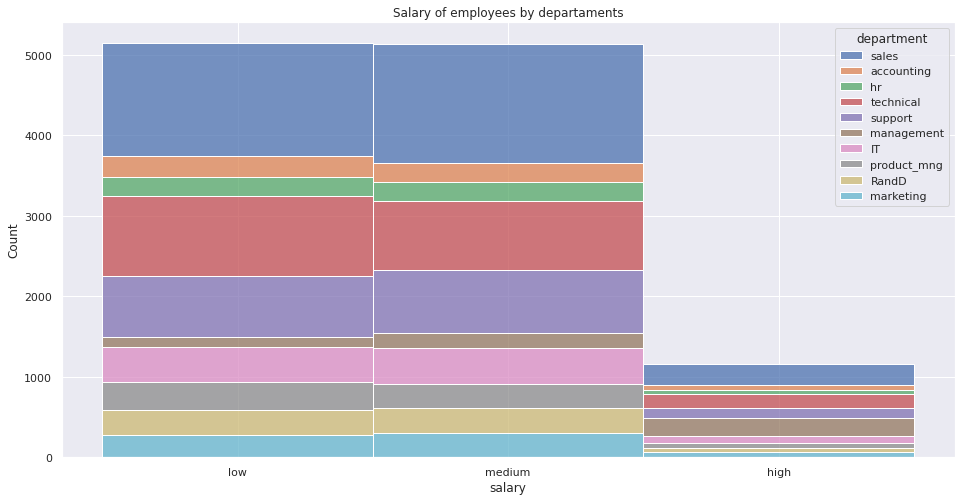

In [102]:
#6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=X_left, x='salary', hue='department', multiple = 'stack')
plt.title('Salary of employees by departaments')

Text(0.5, 1.0, 'Salary of employees by departaments')

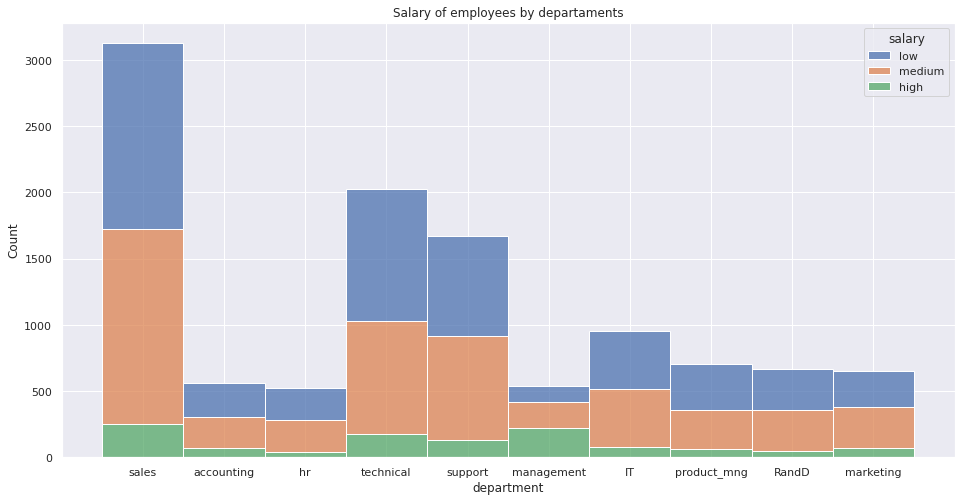

In [103]:
#6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности (так выглядит интереснее).
fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=X_left, x='department', hue='salary', multiple = 'stack')
plt.title('Salary of employees by departaments')

In [ ]:
#7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, 
#  чем сотрудники с низким окладом

In [104]:
X_high = list(X_left.loc[X_left['salary'] == 'high']['average_montly_hours'])

In [105]:
X_low = list(X_left.loc[X_left['salary'] == 'low']['average_montly_hours'])

In [106]:
X_medium = list(X_left.loc[X_left['salary'] == 'medium']['average_montly_hours'])

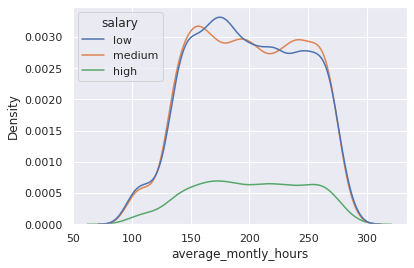

In [107]:
sns.kdeplot(data=X_left, x='average_montly_hours', hue='salary')

In [108]:
t, p = stats.ttest_ind(X_high, X_low)
print(t, p)
# Гипотеза не верна - среднее количество часов на рабочем месте в месяц не влияет на уровень зарплаты.

1.1633551871349677 0.24472950408839797


In [114]:
#8 Рассчитать следующие показатели среди уволившихся сотрудников:
X_no_left = X[X.left != 0]

In [115]:
# a) Доля сотрудников с повышением за последние 5 лет;
len(X_no_left[X_no_left.promotion_last_5years == 1])/len(X_left)

0.001662583129156458

In [116]:
# b) Средняя степень удовлетворенности;
X_no_left['satisfaction_level'].mean()

0.4400980117614114

In [117]:
# c) Среднее количество проектов
X_no_left['number_project'].mean()

3.8555026603192384

In [ ]:
#8 Рассчитать следующие показатели среди не уволившихся сотрудников:

In [111]:
# a) Доля сотрудников с повышением за последние 5 лет;
len(X_left[X_left.promotion_last_5years == 1])/len(X_left)

0.026251312565628283

In [112]:
# b) Средняя степень удовлетворенности;
X_left['satisfaction_level'].mean()

0.666809590479524

In [113]:
# c) Среднее количество проектов
X_left['number_project'].mean()

3.786664333216661

In [ ]:
#9 Разделить данные на тестовую и обучающую выборки.
# Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
# Оценить качество модели на тестовой выборки.

In [130]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years']], X['left'].to_numpy(), test_size=0.25)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [139]:
lda.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0])

In [140]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,0
...,...,...
3745,1,0
3746,0,0
3747,0,0
3748,1,0


In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7541333333333333

In [ ]:
# Качество модели на тестовой выборки составляет 75,41(3)%